In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# reading in the data file
df = pd.read_excel('TechImpactCensusData.xlsx',engine='openpyxl')

In [17]:
# limiting factor lists
cloud_factor = ['T2E36R01','T2E36R02','T2E36R03','T2E36R04','T2E36R05','T2E36R06','T2E36R07','T2E36R08']
ai_factor = ['T1E36R01','T1E36R02','T1E36R03','T1E36R04','T1E36R05','T1E36R06','T1E36R07','T1E36R08']
sftwr_factor = ['T3E36R01','T3E36R02','T3E36R03','T3E36R04','T3E36R05','T3E36R06','T3E36R07','T3E36R08']

In [18]:
# retail dataframes filtered by technologies
cbretail = df[(df.NAICS2017_LABEL == 'Retail trade')]
cbretail = cbretail[cbretail.FACTORS_P.isin(cloud_factor)]

airetail = df[(df.NAICS2017_LABEL == 'Retail trade')]
airetail = airetail[airetail.FACTORS_P.isin(ai_factor)]

swretail = df[(df.NAICS2017_LABEL == 'Retail trade')]
swretail = swretail[swretail.FACTORS_P.isin(sftwr_factor)]

In [19]:
# retail cloud-based 
labels = list(cbretail['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital']

cbretail['FACTORS_P_LABEL'] = cbretail['FACTORS_P_LABEL'].replace(labels,replace_labels)
cbretail = cbretail[['FACTORS_P_LABEL','FIRMPDEMP']]
cbretail.set_index(['FACTORS_P_LABEL'],inplace=True)

In [20]:
# retail ai
labels = list(airetail['FACTORS_P_LABEL'])

airetail['FACTORS_P_LABEL'] = airetail['FACTORS_P_LABEL'].replace(labels,replace_labels)
airetail = airetail[['FACTORS_P_LABEL','FIRMPDEMP']]
airetail.set_index(['FACTORS_P_LABEL'],inplace=True)

In [21]:
# retail software
labels = list(swretail['FACTORS_P_LABEL'])

swretail['FACTORS_P_LABEL'] = swretail['FACTORS_P_LABEL'].replace(labels,replace_labels)
swretail = swretail[['FACTORS_P_LABEL','FIRMPDEMP']]
swretail.set_index(['FACTORS_P_LABEL'],inplace=True)

In [22]:
# recombining retail data into one dataframe
retail = cbretail
retail.columns = ['Cloud-Based Technology']
retail['Specialized Software'] = swretail['FIRMPDEMP']
retail['AI Technology'] = airetail['FIRMPDEMP']

In [23]:
# dropped 'Too expensive' index to see distribution of other factors
r1 = retail.drop(['Too expensive'],axis=0)
r1_sorted = r1.sort_values(by='Cloud-Based Technology',ascending=False)

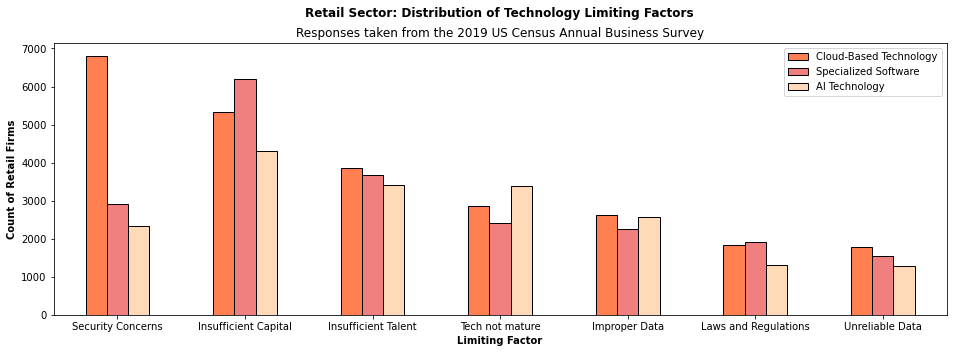

<Figure size 432x288 with 0 Axes>

In [28]:
# plotting limiting factors in retail sector
color_list = ['coral','lightcoral','peachpuff']
r1_sorted.plot(kind='bar',color=color_list,edgecolor = "black",figsize=(16,5),rot=0,title='Responses taken from the 2019 US Census Annual Business Survey')
plt.suptitle('Retail Sector: Distribution of Technology Limiting Factors',fontweight='bold',x=0.512)
plt.xlabel('Limiting Factor',fontweight='bold')
plt.ylabel('Count of Retail Firms',fontweight='bold')
plt.show()
plt.savefig("please.png")

In [31]:
# comparing 'Too expensive' to 'Other' [grouped factors]
group = ['Too expensive','Other','Other','Other','Other','Other','Other','Other']
retail['Group'] = group
r2 = retail.groupby('Group').sum()
r2['All Technologies'] = r2.sum(axis=1)

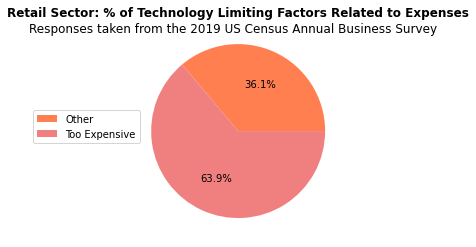

In [33]:
# % Too Expensive for health sector
pie_labels = ['Other','Too Expensive']
pie_colors = ['coral','lightcoral']
plt.pie(r2['All Technologies'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Retail Sector: % of Technology Limiting Factors Related to Expenses',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))

In [34]:
## exploring the need for action -- scale of limiting factors vs. tech not applicable + no limiting factors

In [35]:
cloud_factor = ['T2E36R01','T2E36R02','T2E36R03','T2E36R04','T2E36R05','T2E36R06','T2E36R07','T2E36R08','T2E36R09','T2E36R10']
ai_factor = ['T1E36R01','T1E36R02','T1E36R03','T1E36R04','T1E36R05','T1E36R06','T1E36R07','T1E36R08','T1E36R09','T1E36R10']
sftwr_factor = ['T3E36R01','T3E36R02','T3E36R03','T3E36R04','T3E36R05','T3E36R06','T3E36R07','T3E36R08','T3E36R09','T3E36R10']

In [36]:
swretail = df[(df.NAICS2017_LABEL == 'Retail trade')]
swretail = swretail[swretail.FACTORS_P.isin(sftwr_factor)]

In [37]:
labels = list(swretail['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital','Tech not Applicable','No Limiting Factors']
groupby_labels = ['Other','Other','Other','Other','Other','Other','Other','Other','Tech not Applicable','No Limiting Factors']


swretail['FACTORS_P_LABEL'] = swretail['FACTORS_P_LABEL'].replace(labels,replace_labels)
swretail = swretail[['FACTORS_P_LABEL','FIRMPDEMP']]
swretail.set_index(['FACTORS_P_LABEL'],inplace=True)
swretail['Group'] = groupby_labels

In [38]:
swretail = swretail.groupby('Group').sum()
swretail = swretail.sort_values('FIRMPDEMP',ascending=False)

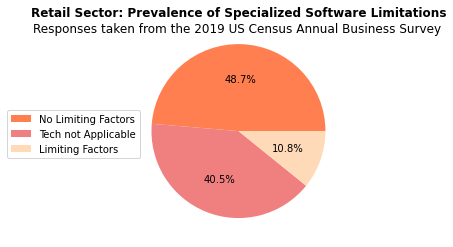

In [40]:
pie_labels = ['No Limiting Factors','Tech not Applicable','Limiting Factors']
pie_colors = ['coral','lightcoral','peachpuff']
plt.pie(swretail['FIRMPDEMP'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Retail Sector: Prevalence of Specialized Software Limitations',fontweight='bold')
plt.suptitle('Responses taken from the 2019 US Census Annual Business Survey',x=.51,y=.88)
plt.legend(pie_labels,bbox_to_anchor=(.07, .62))